In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Company.csv',index_col=0)
data.shape

(400, 11)

In [3]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
Sales,,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,GOOD
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,GOOD
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,GOOD
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,BAD
4.15,141,64,3,340,128,Bad,38,13,Yes,No,BAD


In [6]:
data[data.isnull().any(axis=1)].head()
df=data.dropna()

In [7]:
dummies=pd.get_dummies(df.ShelveLoc)
dummies.head(2)

,Bad,Good,Medium
Sales,,,
9.50,1,0,0
11.22,0,1,0


In [8]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale,Bad,Good,Medium
Sales,,,,,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,GOOD,1,0,0
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,GOOD,0,1,0


In [9]:
dummies=pd.get_dummies(df.Urban)
dummies.head(2)

,No,Yes
Sales,,
9.50,0,1
11.22,0,1


In [10]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale,Bad,Good,Medium,No,Yes
Sales,,,,,,,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,GOOD,1,0,0,0,1
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,GOOD,0,1,0,0,1


In [11]:
dummies=pd.get_dummies(df.US)
dummies.head(2)

,No,Yes
Sales,,
9.50,0,1
11.22,0,1


In [12]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale,Bad,Good,Medium,No,Yes,No,Yes
Sales,,,,,,,,,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,GOOD,1,0,0,0,1,0,1
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,GOOD,0,1,0,0,1,0,1


In [13]:
dummies=pd.get_dummies(df.Sale)
dummies.head(2)

,BAD,GOOD
Sales,,
9.50,0,1
11.22,0,1


In [14]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale,Bad,Good,Medium,No,Yes,No,Yes,BAD,GOOD
Sales,,,,,,,,,,,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,GOOD,1,0,0,0,1,0,1,0,1
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,GOOD,0,1,0,0,1,0,1,0,1


In [15]:
df.drop('ShelveLoc',axis='columns',inplace=True)
df.drop('Urban',axis='columns',inplace=True)
df.drop('US',axis='columns',inplace=True)
df.drop('Sale',axis='columns',inplace=True)
df.drop('BAD',axis='columns',inplace=True)

In [17]:
df
x=df.iloc[:,0:14]
y=df.iloc[:,14]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
y_pred=rf.predict(x_test)

In [21]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds= roc_curve(y_test,y_pred)
roc_auc= auc(false_positive_rate,true_positive_rate)
roc_auc

0.7988505747126435

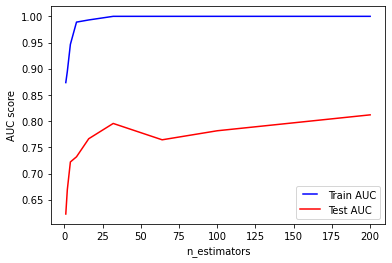

In [24]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_results=[]
test_results=[]

for estimator in n_estimators:
    rf=RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
    rf.fit(x_train,y_train)
    train_pred= rf.predict(x_train)
    false_positive_rate,true_positive_rate,thresholds= roc_curve(y_train,train_pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    y_pred=rf.predict(x_test)
    false_positive_rate,true_positive_rate,thresholds= roc_curve(y_test,y_pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, =plt.plot(n_estimators,train_results,"b",label="Train AUC")
line2, =plt.plot(n_estimators,test_results,"r",label="Test AUC") 
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()
    
    